In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
# Load the dataset
df = pd.read_csv('customer_segment_data.csv')
df.head()


,Customer_Age,Annual_Income,Credit_Score,Loan_Amount,Investment
0,56,125186,414,8239,6439
1,69,54674,622,7710,47964
2,46,55854,339,22384,48062
3,32,66271,339,22038,35563
4,60,93688,588,41846,34964


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop rows with missing values (or handle them appropriately)
df_clean = df.dropna()  # Simple approach: drop rows with any missing values
# Alternative: df_clean = df.fillna({'column_name': value})  # Fill specific columns

# Optional: Drop non-numeric or identifier columns if not needed
# Assuming 'id', 'name' are identifier columns you want to drop
df_clean = df_clean.select_dtypes(include=['number'])  # Keep only numeric columns
# Alternative: df_clean = df_clean.drop(['id', 'name'], axis=1)  # Drop specific columns

# Normalize/Scale the features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Option 1: Min-Max scaling (scales values to range [0,1])
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Option 2: Standard scaling (mean=0, std=1)
# scaler = StandardScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

print("Data preprocessing complete!")

Missing values per column:
Customer_Age     0
Annual_Income    0
Credit_Score     0
Loan_Amount      0
Investment       0
dtype: int64
Data preprocessing complete!


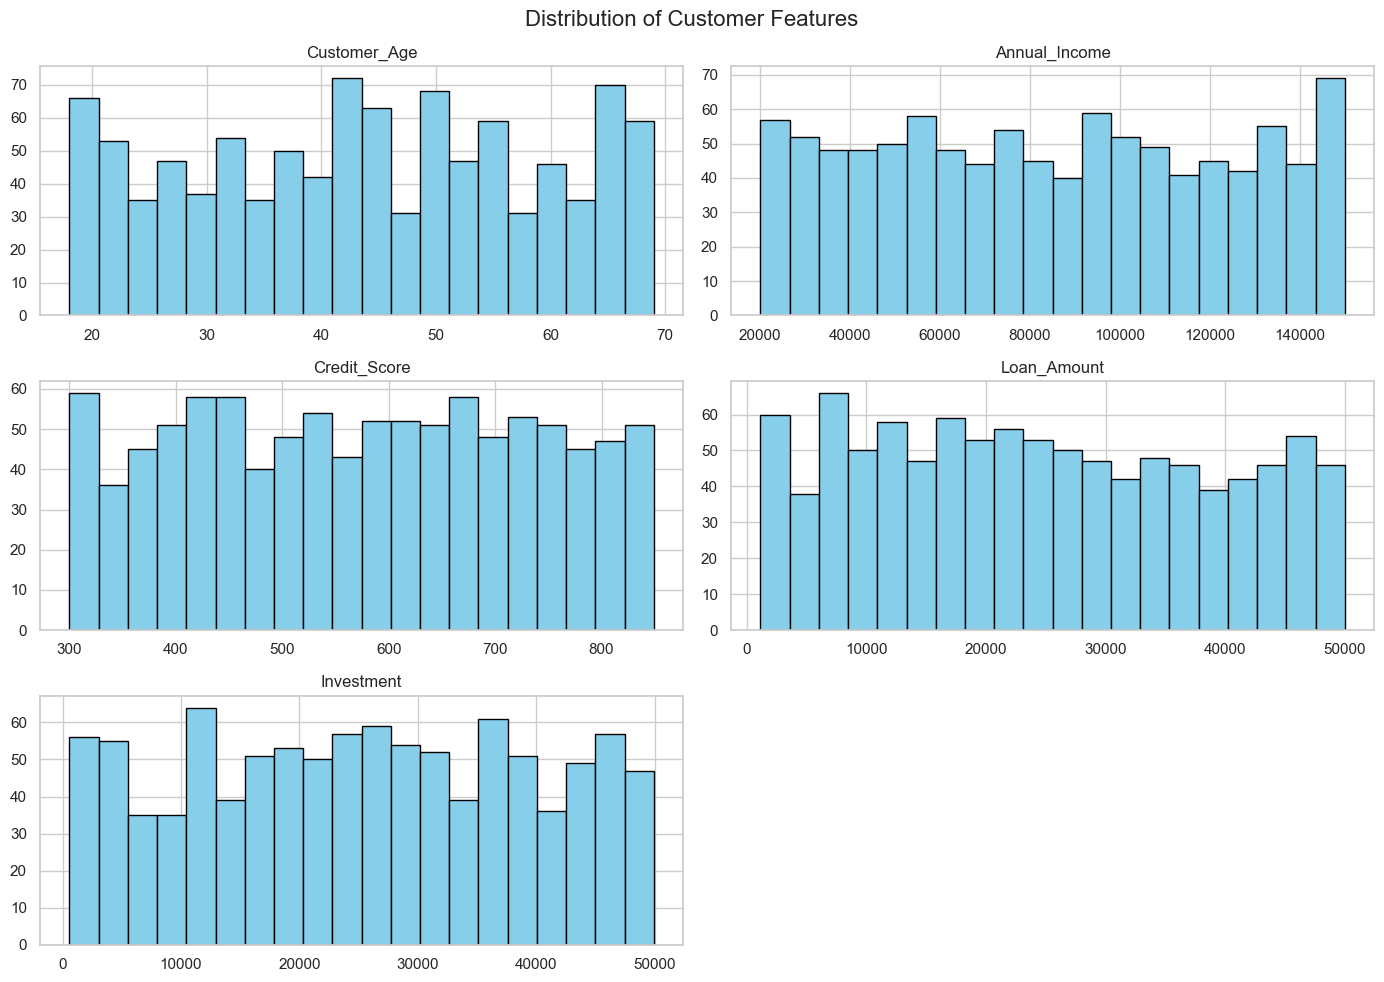

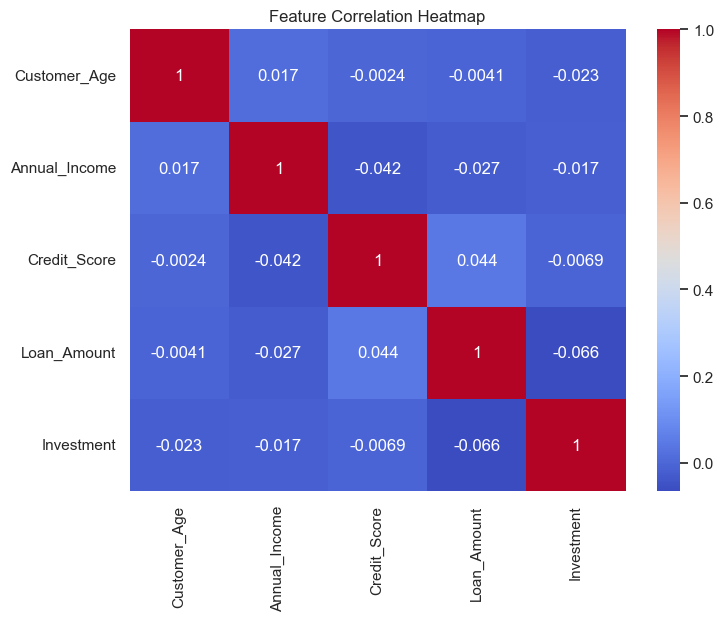

In [7]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

# Plot histograms for all columns
df.hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Customer Features", fontsize=16)
plt.tight_layout()
plt.show()

# Check correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [19]:
# Preprocessing

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale all features
scaled_data = scaler.fit_transform(df)

# Convert scaled data back into a DataFrame for easier handling
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.head() 


,Customer_Age,Annual_Income,Credit_Score,Loan_Amount,Investment,Cluster
0,0.812959,1.048640,-1.018735,-1.162554,-1.338295,-1.290473
1,1.680578,-0.787052,0.298065,-1.200128,1.607355,0.471265
2,0.145560,-0.756332,-1.493542,-0.157853,1.614306,-0.409604
3,-0.788799,-0.485138,-1.493542,-0.182429,0.727668,0.471265
4,1.079919,0.228629,0.082819,1.224507,0.685176,-0.409604


C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

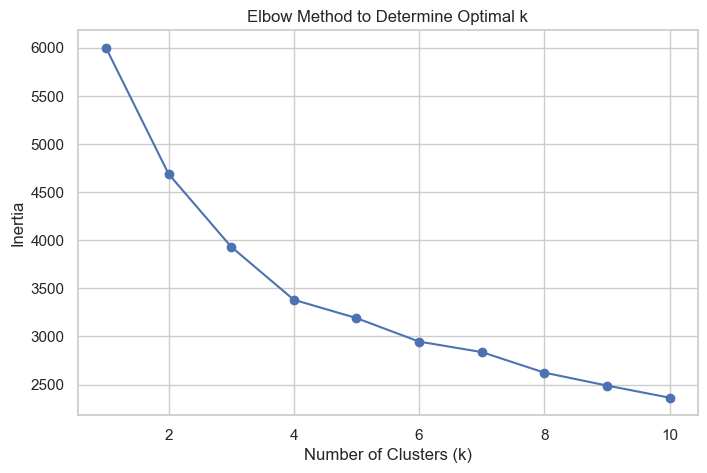

In [23]:
# Elbow Method Code


from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init='auto')
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show() 


In [43]:
#  Fit KMeans with Optimal k. k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(scaled_df)


C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [37]:
# Applying KMeans Clustering
from sklearn.cluster import KMeans

# Fit KMeans with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Check sample output
df.head() 


C:\Users\GAURAV MISHRA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


,Customer_Age,Annual_Income,Credit_Score,Loan_Amount,Investment,Cluster
0,56,125186,414,8239,6439,0
1,69,54674,622,7710,47964,2
2,46,55854,339,22384,48062,3
3,32,66271,339,22038,35563,2
4,60,93688,588,41846,34964,3


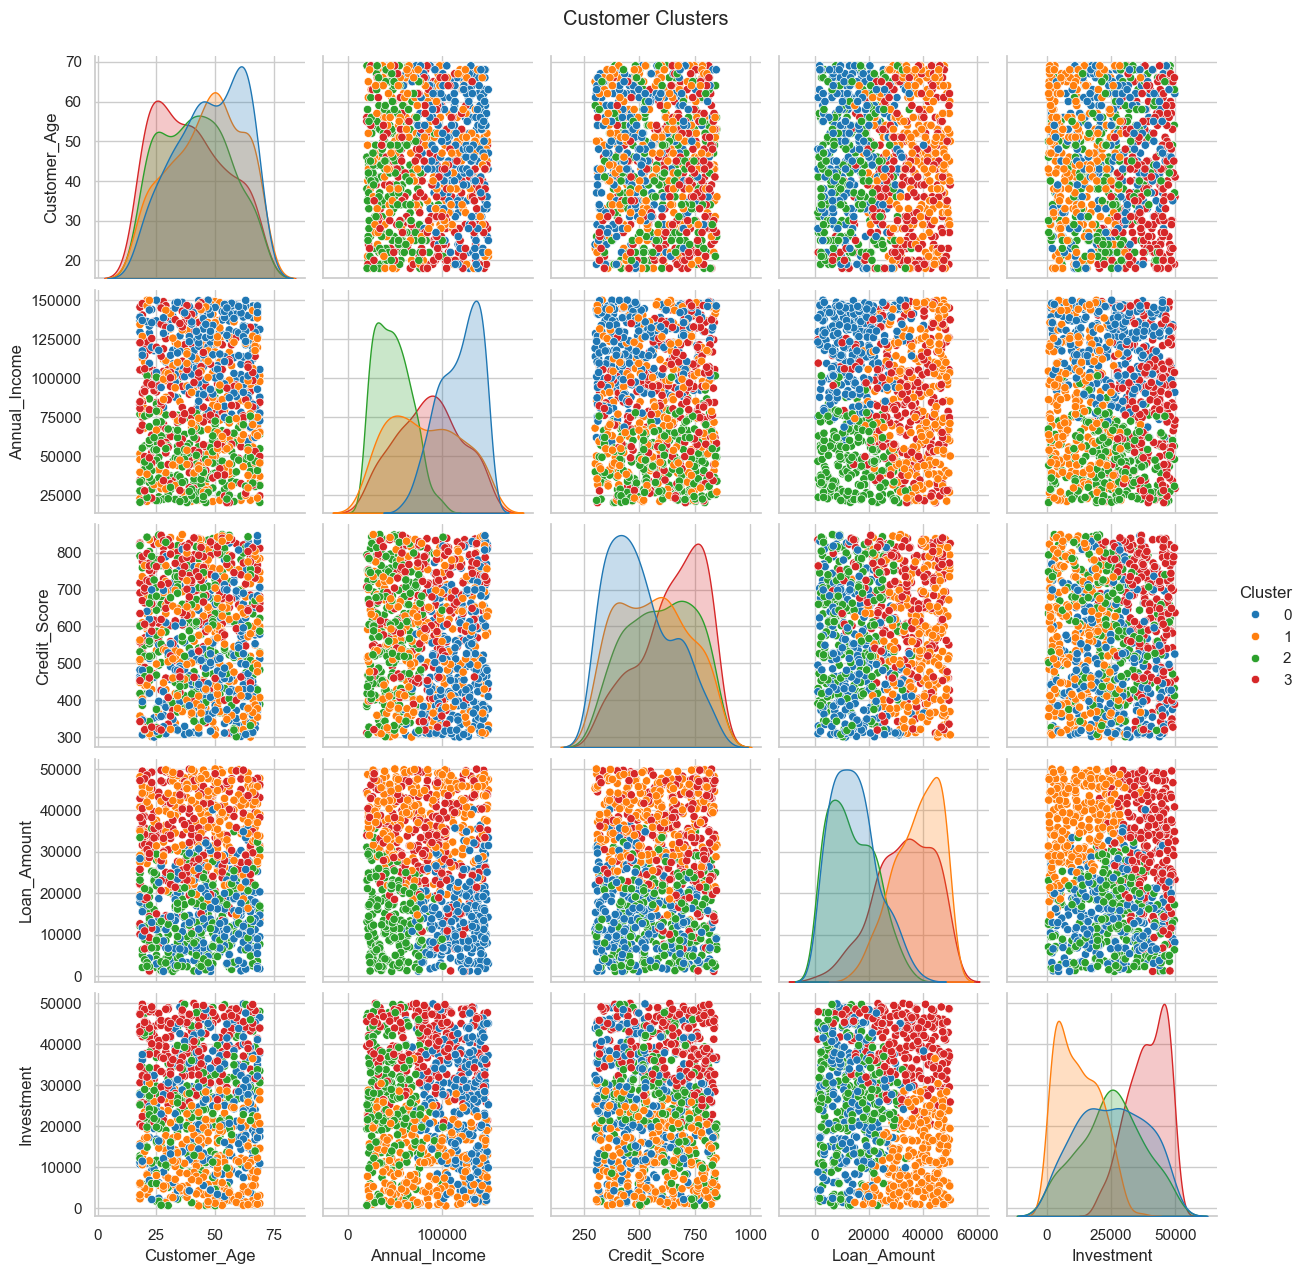

In [33]:
# Visualizing & Interpreting Clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle("Customer Clusters", y=1.02)
plt.show()


In [41]:
df.groupby('Cluster').mean() 


,Customer_Age,Annual_Income,Credit_Score,Loan_Amount,Investment
Cluster,,,,,
0,47.688889,118597.462963,503.518519,14454.870370,25368.170370
1,46.052000,82036.768000,560.080000,37707.368000,12235.408000
2,41.463830,47844.625532,596.782979,13639.217021,24969.102128
3,39.534694,86252.987755,647.771429,32944.955102,38894.000000
